In [35]:
# # Cell 1: Import libraries
# import os
# import numpy as np
# import librosa
# from tqdm import tqdm
# import pandas as pd

In [36]:
# Cell 2: Create features directory
os.makedirs('../data/features/mel', exist_ok=True)

In [37]:
# # Cell 3: Define Mel spectrogram extraction function
# def extract_mel_spectrogram(audio_path, n_mels=128, n_fft=2048, hop_length=128):
#     # Load audio file
#     y, sr = librosa.load(audio_path, sr=None)
    
#     # Extract mel spectrogram
#     mel_spec = librosa.feature.melspectrogram(
#         y=y, 
#         sr=sr,
#         n_mels=n_mels,
#         n_fft=n_fft,
#         hop_length=hop_length,
#         fmin=20,
#         fmax=sr/2,
#         power=2.0
#     )
    
#     # Convert to log scale (dB)
#     mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
#     # Chuẩn hóa về khoảng [0,1]
#     mel_spec_norm = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
    
#     return mel_spec_norm

In [38]:
# Cell 4: Get all audio files from processed directory
processed_dir = '../data/processed'
audio_files = []
for root, dirs, files in os.walk(processed_dir):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

In [39]:
# # Cell 5: Process each audio file
# # Initialize metadata list
# metadata = []

# # Process each audio file
# for audio_path in tqdm(audio_files):
#     # Get relative path from processed directory
#     rel_path = os.path.relpath(audio_path, processed_dir)
#     # Create corresponding directory in features
#     feature_dir = os.path.join('../data/features/mel', os.path.dirname(rel_path))
#     os.makedirs(feature_dir, exist_ok=True)
    
#     # Extract mel spectrogram
#     mel_features = extract_mel_spectrogram(audio_path)
    
#     # Save features with same name but .npy extension
#     feature_path = os.path.join(feature_dir, os.path.splitext(os.path.basename(audio_path))[0] + '.npy')
#     np.save(feature_path, mel_features)
    
#     # Add to metadata
#     metadata.append({
#         'audio_path': rel_path,
#         'feature_path': os.path.relpath(feature_path, '../data/features/mel'),
#         'mel_shape': mel_features.shape,
#         'duration': librosa.get_duration(path=audio_path),
#         'sr': librosa.get_samplerate(audio_path)
#     })

# # Convert metadata to DataFrame and save
# metadata_df = pd.DataFrame(metadata)
# metadata_df.to_csv('../data/features/mel/metadata.csv', index=False)

In [40]:
# # Cell 6: Display metadata summary
# print("Metadata Summary:")
# print(f"Total files processed: {len(metadata_df)}")
# print("\nFeature shapes:")
# print(metadata_df['mel_shape'].value_counts())
# print("\nSample rate distribution:")
# print(metadata_df['sr'].value_counts())
# print("\nDuration statistics (seconds):")
# print(metadata_df['duration'].describe())

# # Display first few rows of metadata
# print("\nFirst few entries:")
# print(metadata_df.head())

In [41]:
# # Cell 7: Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set style
# plt.style.use('seaborn')

# # 1. Mel Spectrogram Heatmap
# plt.figure(figsize=(15, 10))
# n_examples = min(4, len(metadata_df))

# for i in range(n_examples):
#     plt.subplot(2, 2, i+1)
#     feature_path = os.path.join('../data/features/mel', metadata_df.iloc[i]['feature_path'])
#     mel_features = np.load(feature_path)
    
#     plt.imshow(mel_features, aspect='auto', origin='lower', cmap='viridis')
#     plt.title(f'Mel Spectrogram: {metadata_df.iloc[i]["audio_path"]}')
#     plt.xlabel('Time')
#     plt.ylabel('Mel Bins')
#     plt.colorbar(label='dB')

# plt.tight_layout()
# plt.show()

# # 2. Mel Spectrogram Statistics
# plt.figure(figsize=(15, 5))

# feature_path = os.path.join('../data/features/mel', metadata_df.iloc[0]['feature_path'])
# mel_features = np.load(feature_path)

# plt.subplot(1, 2, 1)
# plt.plot(mel_features.mean(axis=1), label='Mean')
# plt.plot(mel_features.std(axis=1), label='Std')
# plt.title('Mel Spectrogram Mean and Standard Deviation')
# plt.xlabel('Mel Bin')
# plt.ylabel('Value (dB)')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(mel_features.max(axis=1), label='Max')
# plt.plot(mel_features.min(axis=1), label='Min')
# plt.title('Mel Spectrogram Max and Min Values')
# plt.xlabel('Mel Bin')
# plt.ylabel('Value (dB)')
# plt.legend()

# plt.tight_layout()
# plt.show()

100%|██████████| 422/422 [00:03<00:00, 139.07it/s]
/tmp/ipykernel_235976/3813583190.py:101: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Metadata Summary:
Total files processed: 422

Feature shapes:
mel_shape
(128, 32)    422
Name: count, dtype: int64

Sample rate distribution:
sr
16000    422
Name: count, dtype: int64

Duration statistics (seconds):
count    422.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: duration, dtype: float64

First few entries:
                      audio_path                   feature_path  mel_shape  \
0  do_am/do_am_speaker03_005.wav  do_am/do_am_speaker03_005.npy  (128, 32)   
1  do_am/do_am_speaker02_016.wav  do_am/do_am_speaker02_016.npy  (128, 32)   
2  do_am/do_am_speaker02_015.wav  do_am/do_am_speaker02_015.npy  (128, 32)   
3  do_am/do_am_speaker02_027.wav  do_am/do_am_speaker02_027.npy  (128, 32)   
4  do_am/do_am_speaker02_020.wav  do_am/do_am_speaker02_020.npy  (128, 32)   

   duration     sr  
0       1.0  16000  
1       1.0  16000  
2       1.0  16000  
3       1.0  16000  
4       1.0  16000  


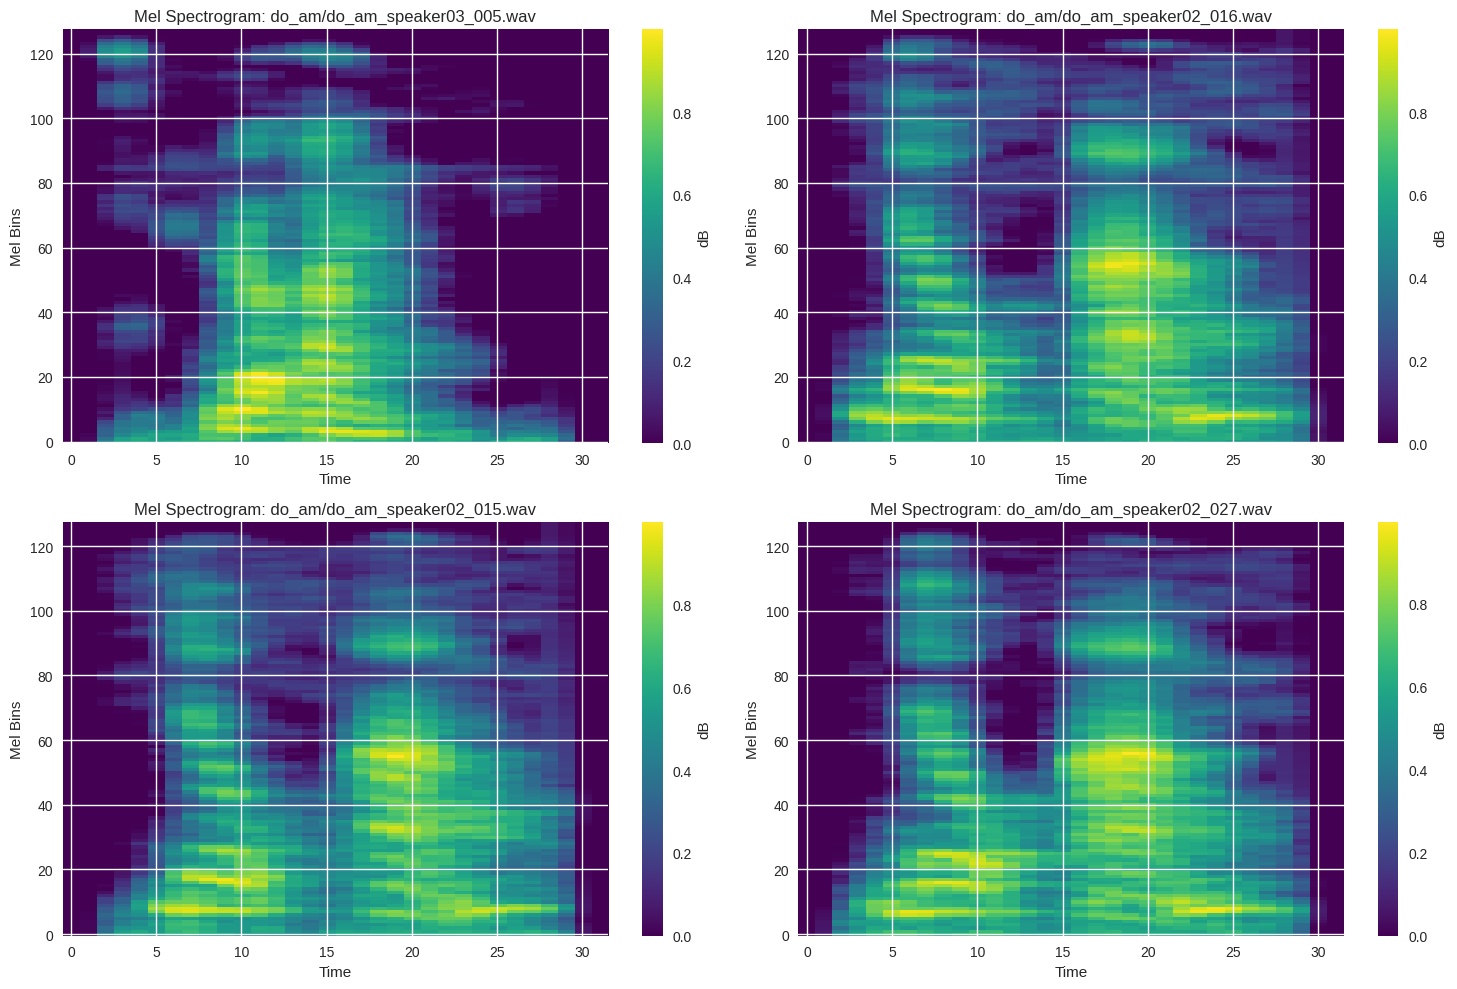

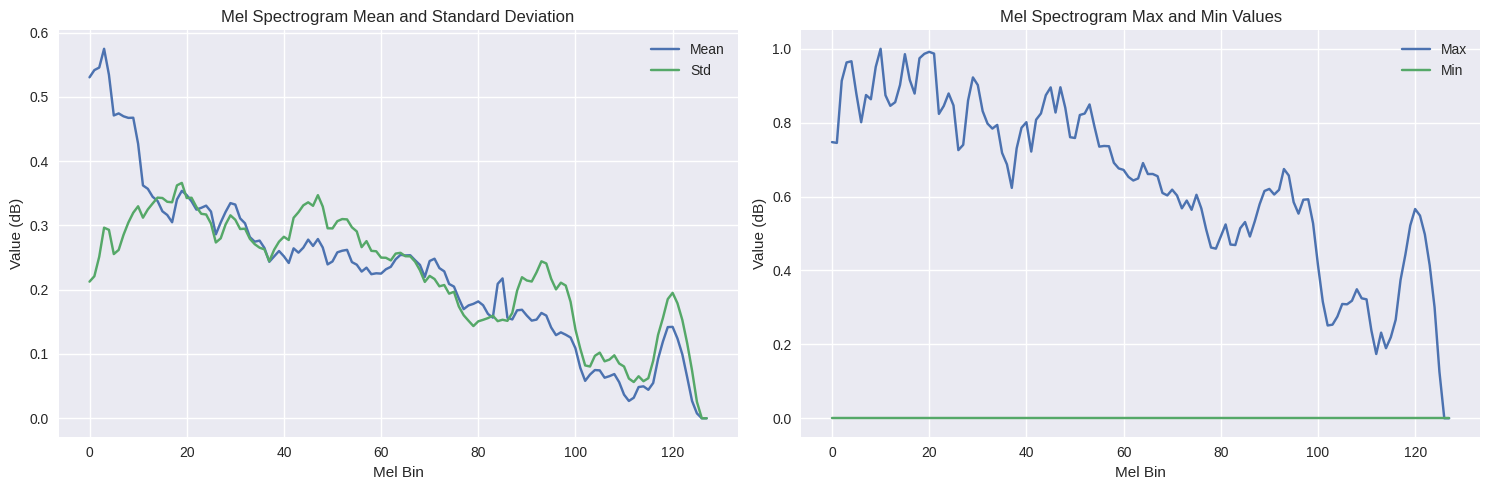

In [42]:
# Cell 1: Import libraries
import os
import numpy as np
import librosa
from tqdm import tqdm
import pandas as pd
import tensorflow as tf

# Cell 2: Create features directory
os.makedirs('../data/features/mel', exist_ok=True)

# Cell 3: Define Mel spectrogram extraction function
def extract_mel_spectrogram(audio_path, n_mels=128, n_fft=2048, hop_length=128):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y, 
        sr=sr,
        n_mels=n_mels,
        n_fft=n_fft,
        hop_length=hop_length,
        fmin=20,
        fmax=sr/2,
        power=2.0
    )
    
    # Convert to log scale (dB)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Chuẩn hóa về khoảng [0,1]
    mel_spec_norm = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
    
    # Resize về kích thước cố định (128, 32)
    mel_spec_norm = tf.image.resize(mel_spec_norm[..., np.newaxis], (128, 32))
    mel_spec_norm = mel_spec_norm.numpy()
    mel_spec_norm = mel_spec_norm[..., 0]
    
    return mel_spec_norm

# Cell 4: Get all audio files from processed directory
processed_dir = '../data/processed'
audio_files = []
for root, dirs, files in os.walk(processed_dir):
    for file in files:
        if file.endswith('.wav'):
            audio_files.append(os.path.join(root, file))

# Cell 5: Process each audio file
# Initialize metadata list
metadata = []

# Process each audio file
for audio_path in tqdm(audio_files):
    # Get relative path from processed directory
    rel_path = os.path.relpath(audio_path, processed_dir)
    # Create corresponding directory in features
    feature_dir = os.path.join('../data/features/mel', os.path.dirname(rel_path))
    os.makedirs(feature_dir, exist_ok=True)
    
    # Extract mel spectrogram
    mel_features = extract_mel_spectrogram(audio_path)
    
    # Save features with same name but .npy extension
    feature_path = os.path.join(feature_dir, os.path.splitext(os.path.basename(audio_path))[0] + '.npy')
    np.save(feature_path, mel_features)
    
    # Add to metadata
    metadata.append({
        'audio_path': rel_path,
        'feature_path': os.path.relpath(feature_path, '../data/features/mel'),
        'mel_shape': mel_features.shape,
        'duration': librosa.get_duration(path=audio_path),
        'sr': librosa.get_samplerate(audio_path)
    })

# Convert metadata to DataFrame and save
metadata_df = pd.DataFrame(metadata)
metadata_df.to_csv('../data/features/mel/metadata.csv', index=False)

# Cell 6: Display metadata summary
print("Metadata Summary:")
print(f"Total files processed: {len(metadata_df)}")
print("\nFeature shapes:")
print(metadata_df['mel_shape'].value_counts())
print("\nSample rate distribution:")
print(metadata_df['sr'].value_counts())
print("\nDuration statistics (seconds):")
print(metadata_df['duration'].describe())

# Display first few rows of metadata
print("\nFirst few entries:")
print(metadata_df.head())

# Cell 7: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn')

# 1. Mel Spectrogram Heatmap
plt.figure(figsize=(15, 10))
n_examples = min(4, len(metadata_df))

for i in range(n_examples):
    plt.subplot(2, 2, i+1)
    feature_path = os.path.join('../data/features/mel', metadata_df.iloc[i]['feature_path'])
    mel_features = np.load(feature_path)
    
    plt.imshow(mel_features, aspect='auto', origin='lower', cmap='viridis')
    plt.title(f'Mel Spectrogram: {metadata_df.iloc[i]["audio_path"]}')
    plt.xlabel('Time')
    plt.ylabel('Mel Bins')
    plt.colorbar(label='dB')

plt.tight_layout()
plt.show()

# 2. Mel Spectrogram Statistics
plt.figure(figsize=(15, 5))

feature_path = os.path.join('../data/features/mel', metadata_df.iloc[0]['feature_path'])
mel_features = np.load(feature_path)

plt.subplot(1, 2, 1)
plt.plot(mel_features.mean(axis=1), label='Mean')
plt.plot(mel_features.std(axis=1), label='Std')
plt.title('Mel Spectrogram Mean and Standard Deviation')
plt.xlabel('Mel Bin')
plt.ylabel('Value (dB)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mel_features.max(axis=1), label='Max')
plt.plot(mel_features.min(axis=1), label='Min')
plt.title('Mel Spectrogram Max and Min Values')
plt.xlabel('Mel Bin')
plt.ylabel('Value (dB)')
plt.legend()

plt.tight_layout()
plt.show()